# EDA Taxi + Weather Data

In [1]:
import os
import ibis
from dotenv import load_dotenv

load_dotenv()

# Create ibis connection using browser-based OAuth
con = ibis.databricks.connect(
    host=os.getenv("DATABRICKS_SERVER_HOSTNAME"),
    http_path=os.getenv("DATABRICKS_HTTP_PATH"),
    auth_type="databricks-oauth",
    catalog="jb-demos"
)

# Access the table
taxi_weather = con.table("taxi_weather_joined", database="nyc-taxi-data-engineering")

# Display basic info about the table
taxi_weather

DatabaseTable: nyc-taxi-data-engineering.taxi_weather_joined
  tpep_pickup_datetime  timestamp('UTC')
  tpep_dropoff_datetime timestamp('UTC')
  pickup_zip            int32
  dropoff_zip           int32
  trip_distance         float64
  fare_amount           float64
  temperature_2m        float32
  relative_humidity_2m  float32
  precipitation         float32
  rain                  float32
  snowfall              float32
  wind_speed_10m        float32
  weather_code          int32
  weather_category      string
  is_raining            boolean
  is_snowing            boolean
  pickup_date           date
  pickup_hour           int32

In [2]:
# Explore the data - convert to pandas to display
taxi_weather.head(10).to_pandas()

,tpep_pickup_datetime,tpep_dropoff_datetime,pickup_zip,dropoff_zip,trip_distance,fare_amount,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,wind_speed_10m,weather_code,weather_category,is_raining,is_snowing,pickup_date,pickup_hour
0,2016-02-20 21:46:14+00:00,2016-02-20 21:53:29+00:00,11102,11106,1.93,8.0,7.6,71.0,0.0,0.0,0.0,17.600000,0,Clear,False,False,2016-02-20,21
1,2016-02-11 09:35:51+00:00,2016-02-11 10:11:07+00:00,10018,10005,6.30,28.0,-5.4,46.0,0.0,0.0,0.0,23.200001,1,Partly Cloudy,False,False,2016-02-11,9
2,2016-02-24 15:20:16+00:00,2016-02-24 15:26:11+00:00,10001,10119,0.68,5.5,11.6,98.0,1.3,1.3,0.0,16.299999,61,Rain,True,False,2016-02-24,15
3,2016-02-27 21:03:35+00:00,2016-02-27 21:15:38+00:00,10021,10018,2.40,10.5,0.7,59.0,0.0,0.0,0.0,15.000000,1,Partly Cloudy,False,False,2016-02-27,21
4,2016-01-12 14:29:27+00:00,2016-01-12 14:36:39+00:00,10119,10011,1.06,6.5,5.6,44.0,0.0,0.0,0.0,19.200001,3,Partly Cloudy,False,False,2016-01-12,14
5,2016-01-10 18:15:32+00:00,2016-01-10 18:19:17+00:00,10028,10028,0.71,5.0,10.0,90.0,0.0,0.0,0.0,12.500000,1,Partly Cloudy,False,False,2016-01-10,18
6,2016-01-28 07:45:04+00:00,2016-01-28 07:47:45+00:00,10023,10162,0.93,4.5,-8.0,82.0,0.0,0.0,0.0,2.700000,2,Partly Cloudy,False,False,2016-01-28,7
7,2016-02-24 22:31:53+00:00,2016-02-24 22:39:30+00:00,10152,10021,1.69,7.5,14.0,96.0,3.0,3.0,0.0,35.700001,63,Rain,True,False,2016-02-24,22
8,2016-02-17 14:11:09+00:00,2016-02-17 14:15:03+00:00,10021,10021,0.50,4.5,4.4,50.0,0.0,0.0,0.0,15.300000,3,Partly Cloudy,False,False,2016-02-17,14
9,2016-02-05 22:22:44+00:00,2016-02-05 22:40:40+00:00,10001,10028,3.60,14.5,-3.4,66.0,0.0,0.0,0.0,12.500000,0,Clear,False,False,2016-02-05,22


In [3]:
# Prepare data for visualization
import polars as pl

# Convert to polars for easier manipulation
df = taxi_weather.to_polars()

# Create weather condition categories for clearer visualization
df = df.with_columns([
    pl.when(pl.col("is_raining")).then(pl.lit("Rain"))
    .when(pl.col("is_snowing")).then(pl.lit("Snow"))
    .when(pl.col("weather_category") == "Clear").then(pl.lit("Clear"))
    .otherwise(pl.col("weather_category"))
    .alias("weather_condition")
])

df.head()

tpep_pickup_datetime,tpep_dropoff_datetime,pickup_zip,dropoff_zip,trip_distance,fare_amount,temperature_2m,relative_humidity_2m,precipitation,rain,snowfall,wind_speed_10m,weather_code,weather_category,is_raining,is_snowing,pickup_date,pickup_hour,weather_condition
"datetime[ns, UTC]","datetime[ns, UTC]",i32,i32,f64,f64,f32,f32,f32,f32,f32,f32,i32,str,bool,bool,date,i32,str
2016-02-20 21:46:14 UTC,2016-02-20 21:53:29 UTC,11102,11106,1.93,8.0,7.6,71.0,0.0,0.0,0.0,17.6,0,"""Clear""",false,false,2016-02-20,21,"""Clear"""
2016-02-11 09:35:51 UTC,2016-02-11 10:11:07 UTC,10018,10005,6.3,28.0,-5.4,46.0,0.0,0.0,0.0,23.200001,1,"""Partly Cloudy""",false,false,2016-02-11,9,"""Partly Cloudy"""
2016-02-24 15:20:16 UTC,2016-02-24 15:26:11 UTC,10001,10119,0.68,5.5,11.6,98.0,1.3,1.3,0.0,16.299999,61,"""Rain""",true,false,2016-02-24,15,"""Rain"""
2016-02-27 21:03:35 UTC,2016-02-27 21:15:38 UTC,10021,10018,2.4,10.5,0.7,59.0,0.0,0.0,0.0,15.0,1,"""Partly Cloudy""",false,false,2016-02-27,21,"""Partly Cloudy"""
2016-01-12 14:29:27 UTC,2016-01-12 14:36:39 UTC,10119,10011,1.06,6.5,5.6,44.0,0.0,0.0,0.0,19.200001,3,"""Partly Cloudy""",false,false,2016-01-12,14,"""Partly Cloudy"""


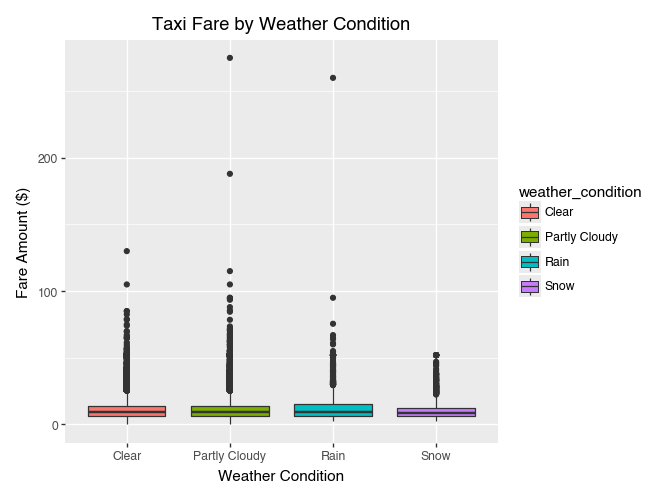

In [4]:
from plotnine import *

# Visualize fare amounts by weather condition
(
    ggplot(df, aes(x="weather_condition", y="fare_amount", fill="weather_condition"))
    + geom_boxplot()
    + labs(
        title="Taxi Fare by Weather Condition",
        x="Weather Condition",
        y="Fare Amount ($)"
    )
)

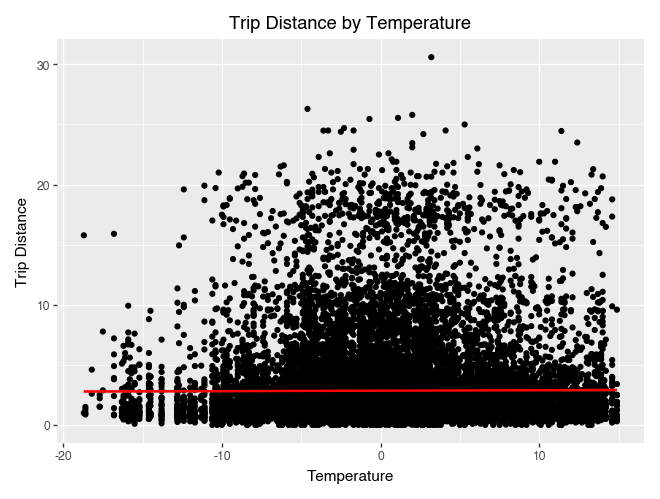

In [11]:
(
  ggplot(df, aes(x = "temperature_2m", y = "trip_distance"))
  + geom_point()
  + geom_smooth(color = "red")
  + labs(
    title = "Trip Distance by Temperature",
    x = "Temperature",
    y = "Trip Distance"
  )
)